In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageFilter
import io
import torch

import sys
import patcher
import gc
import yaml

sys.path.append("../")


def clear_gpu() -> None:
    torch.clear_autocast_cache()
    torch.cuda.ipc_collect()
    torch.cuda.empty_cache()
    gc.collect()

def plot_training(losses, title='Loss over time'):
    # clear_output(wait=True)
    plt.plot(losses)
    plt.title(title)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gen = torch.Generator()
gen.manual_seed(0)


def dump_to_pickle(data, file_path: str):
    try:
        with open(file_path, "wb") as file:
            pickle.dump(data, file)
        print(f"Data successfully dumped to {file_path}")
    except Exception as e:
        print(f"An error occurred while dumping data: {e}")


def load_from_pickle(file_path: str):
    try:
        with open(file_path, "rb") as file:
            data = pickle.load(file)
        print(f"Data successfully loaded from {file_path}")
        return data
    except Exception as e:
        print(f"An error occurred while loading data: {e}")
        return None

def display(image: torch.Tensor):
    # Convert the tensor to a numpy array and transpose it to [H, W, C]
    image_np = image.permute(1, 2, 0).numpy()

    # Display the image using matplotlib
    plt.imshow(image_np)
    plt.axis('off')  # Hide the axis
    plt.show()

# img_frs_seq = load_from_pickle("img_frs_seq.pkl")[:10]
# msk_frs_seq = load_from_pickle("msk_frs_seq.pkl")[:10]
# stylized = load_from_pickle("stylized.pkl")[:10]
# memo_flows_fwd = load_from_pickle("memo_flows_fwd.pkl")[:10]
# memo_flows_bwd = load_from_pickle("memo_flows_bwd.pkl")[:10]

img_frs_ts = load_from_pickle("img_frs_ts.pkl")[:12]
stl_frs_ts = load_from_pickle("stl_frs_ts.pkl")[:12]
# msk_frs_ts = load_from_pickle("msk_frs_ts.pkl")
# stl_frames = torch.cat(
#     [
#         stl_frs_ts[0].unsqueeze(0),
#         stl_frs_ts[5].unsqueeze(0),
#         stl_frs_ts[11].unsqueeze(0),
#     ]
# )


j:\AI\ComfyUI_windows_portable\python_embeded\Lib\site-packages\transformers\utils\hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Data successfully loaded from img_frs_ts.pkl
Data successfully loaded from stl_frs_ts.pkl


In [4]:
# img_frs_seq = load_from_pickle("img_frs_seq.pkl")
# msk_frs_seq = load_from_pickle("msk_frs_seq.pkl")
# stylized = load_from_pickle("stylized.pkl")

# img_frs_ts = patcher.np_to_tensor(img_frs_seq)
# stl_frs_ts = patcher.np_to_tensor(stylized)
# msk_frs_ts = patcher.np_msk_to_tensor(msk_frs_seq)
# dump_to_pickle(img_frs_ts, "img_frs_ts.pkl")
# dump_to_pickle(stl_frs_ts, "stl_frs_ts.pkl")
# dump_to_pickle(msk_frs_ts, "msk_frs_ts.pkl")

# img_frs_ts = load_from_pickle("img_frs_ts.pkl")[:12]
# stl_frs_ts = load_from_pickle("stl_frs_ts.pkl")[:12]
# # msk_frs_ts = load_from_pickle("msk_frs_ts.pkl")
# stl_frames = torch.cat(
#     [
#         stl_frs_ts[0].unsqueeze(0),
#         stl_frs_ts[5].unsqueeze(0),
#         stl_frs_ts[11].unsqueeze(0),
#     ]
# )

Data successfully loaded from img_frs_seq.pkl
Data successfully loaded from msk_frs_seq.pkl
Data successfully loaded from stylized.pkl
Data successfully dumped to img_frs_ts.pkl
Data successfully dumped to stl_frs_ts.pkl
Data successfully dumped to msk_frs_ts.pkl
Data successfully loaded from img_frs_ts.pkl
Data successfully loaded from stl_frs_ts.pkl


In [2]:
cfg_path = "J:/AI/sanct/PatchBased-StyleTransfer/config/reference_P.yaml"
with open(cfg_path, "r") as f:
    job_description = yaml.full_load(f)

(
    generator,
    opt_generator,
    discriminator,
    opt_discriminator,
    perception_loss_model,
    perception_loss_weight,
    reconstruction_criterion,
    adversarial_criterion,
) = patcher.init_model(job_description, device)


In [3]:
clear_gpu()

In [3]:
stl_frames = torch.cat(
    [
        stl_frs_ts[0].unsqueeze(0),
        stl_frs_ts[11].unsqueeze(0),
    ]
)

last_g_losses, last_d_losses = patcher.train(
    org_frames=img_frs_ts.float(),
    stl_frames=stl_frames.float(),
    stl_indices=[0, 11],
    generator=generator,
    opt_generator = opt_generator,
    discriminator = discriminator,
    opt_discriminator = opt_discriminator,
    perception_loss_model = perception_loss_model,
    reconstruction_criterion = reconstruction_criterion,
    adversarial_criterion = adversarial_criterion,
    device = device,
    num_epochs = 200,
    batch_size=40,
    patch_size=36
)


  0%|          | 0/201 [00:00<?, ?it/s]j:\AI\ComfyUI_windows_portable\python_embeded\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
j:\AI\ComfyUI_windows_portable\python_embeded\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Training epoch [200] G[0.65390] D[0.48579]: 100%|██████████| 201/201 [06:43<00:00,  2.01s/it]


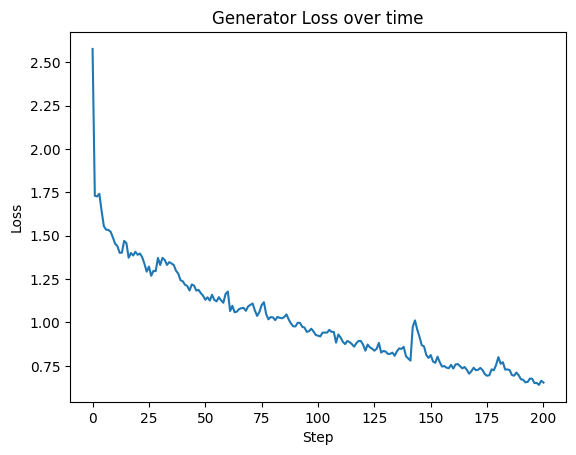

In [4]:
plot_training(last_g_losses, "Generator Loss over time")

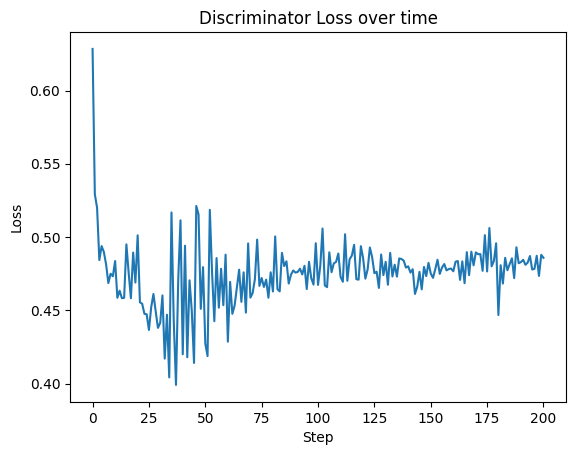

In [5]:
plot_training(last_d_losses, "Discriminator Loss over time")

In [18]:
clear_gpu()
out_full = generator.forward(img_frs_ts[1].float().unsqueeze(0).to(device))
                  
                  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11219867..0.998672].


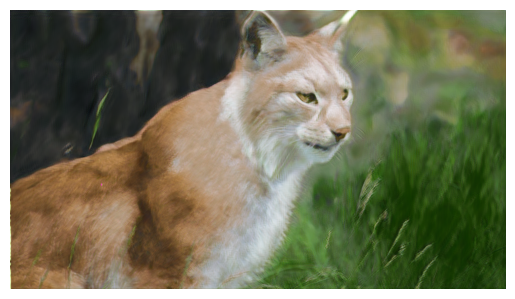

In [22]:
display(out_full.squeeze().detach().cpu())